In [1]:
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 3]

import sys
sys.path.append('/Users/kai/src/psc/python')
import psc

In [2]:
#xr.backends.plugins.guess_engine("/Users/kai/src/psc/build-mac/pfd.000000000.bp")
ds = xr.open_dataset("/Users/kai/src/psc/build-mac/pfd.000000100.bp", engine='pscadios2')
#ds

open


In [3]:
ds.jx_ec

reading  jeh [0 0 0 0] [  1  80 240   1]


<xarray.DataArray 'jx_ec' (x: 1, y: 80, z: 240)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  3.687026e-05,  0.000000e+00],
        [-6.340064e-05, -4.785468e-05, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-8.375298e-06,  1.769851e-05, ..., -3.664266e-05, -1.696242e-05],
        [-3.613592e-05, -1.329397e-06, ..., -6.504738e-05, -5.926569e-05]]],
      dtype=float32)
Coordinates:
  * x        (x) float64 0.0
  * y        (y) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 75.0 76.0 77.0 78.0 79.0
  * z        (z) float64 0.0 1.0 2.0 3.0 4.0 ... 235.0 236.0 237.0 238.0 239.0

reading  jeh [  0   0 100   1] [ 1 80 51  1]


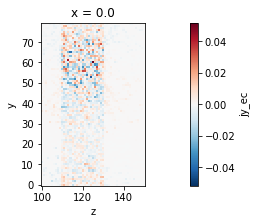

In [4]:
ds.jy_ec.sel(z=slice(100, 150)).plot()
plt.gca().set_aspect('equal')